In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

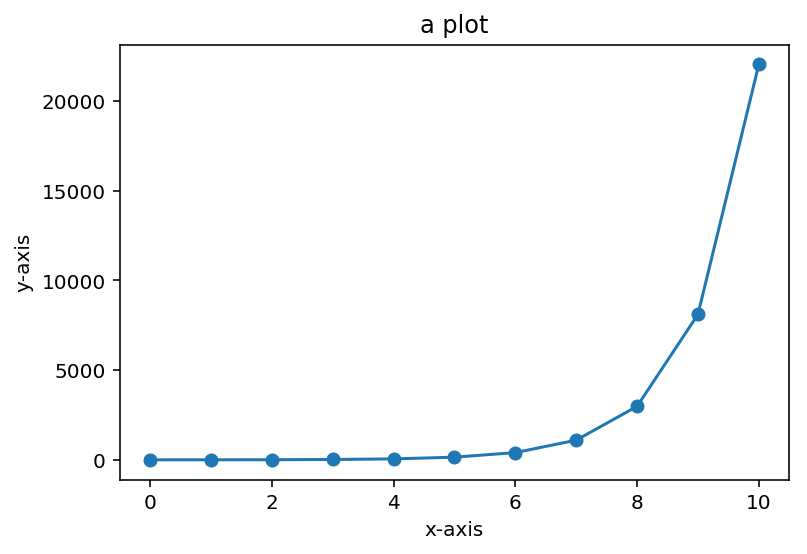

In [3]:
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

The plot shown above was created with the default settings of matplotlib. It looks good in the notebook, but it is not suitable for all purposes. For example, in a paper you need to have a high information density, hence you want a smaller plot. For a presentation or poster, the text needs to be readable at distance, en especially for presentation you need to make sure that your lines are thick enough to be visible (always expect to present in a room with a crappy projector and a lot of daylight).

# Making a paper ready plot

The first step of making the figure publication ready to change it's size. Let's say that we want to have 4 square plots in a row and an a4 page is 21 cm wide and has 2.5 cm margins. 
* Compute how wide a plot should be.
* Look in the documentation for `figsize` in the documentation of `plt.figure` and use it to change the size of your plot

In [ ]:
# make plot of specific size

Journals often have requirements for the font sizes in figures. To set the font size for specific elements, we have to replace the `ax.set` command with specific commands for each label, e.g.: `ax.set_title('title',fontsize=8)`. Similar commands exist for the xlabel (`ax.set_xlabel`) and ylabel (`ax.set_ylabel`). Create a plot according to the following guidelines:

* font size title = 12pt
* font size x and y labels = 10pt

In [6]:
# repeat previous plot and change font sizes

Setting the font size for the tick labels (the numbers on the axes) is a bit different. For this we use the `ax.tick_params` function. This function gives you full control of the ticks and the tick labels. Look throught the documentation of `ax.tick_params` to find the parameter that changes the font size of the labels and set this to 8 points. 

In [7]:
# set tick label fonts

# Making a presentation ready plot

In the previous section you made a tiny plot with tiny fonts. Now, use the same methods to make a plot according to the following specification:
* size: 10x10 cm
* font size title: 20pt
* font size axes labels: 18pt
* font size tick labels: 16pt

And make sure to change to marker size such that the markers have a reasonable size.

In [ ]:
# make a presentation ready plot

This plot and the fonts are now big, but the line is still very thin and may not be visible. The line width can be changed by changing the `linewidth` in the plot function; use this uption to make the line much thicker:

In [8]:
# make lines thinker

# Controlling figure aesthetics with Seaborn

As you have seen in the previous few exercises, it is possible to modify your plots, but it can be quite some work. One way to make this easier is by using seaborn *styles* and *contexts*. Seaborn styles control the overall look of a plot and seaborn contexts hold properties that should be context dependent such as font size and line width. 

Seaborn has 5 styles: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks` which can be set with `sns.set_style("style_name")`. Add this to the code below and see how each style looks:

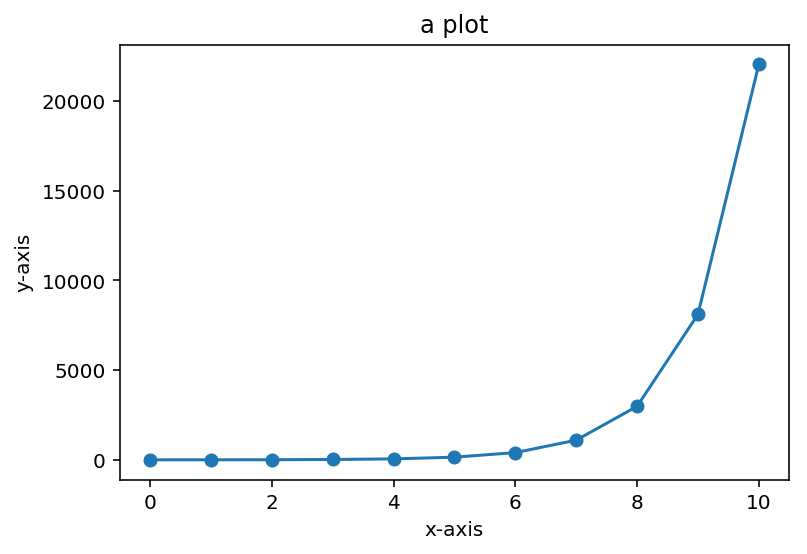

In [4]:
# add sns.set_style()
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

You can further customize your plot by changing seaborn's settings. The style settings are stored in a dictionary which you can get with `sns.axes_style("style-name")`. When setting the style, you can provide a custom dictionary with the elements you want to change: `sns.set_style('ticks',rc={"property-name":"custom-value"}`. Use this to achieve the following:
* A plot with the `ticks` style and a grid in the background
* A plot with the `ticks` style with no line (spines) on the top or on the right

In [12]:
# list options
sns.axes_style("dark").keys()

dict_keys(['figure.facecolor', 'axes.labelcolor', 'xtick.direction', 'ytick.direction', 'xtick.color', 'ytick.color', 'axes.axisbelow', 'grid.linestyle', 'text.color', 'font.family', 'font.sans-serif', 'lines.solid_capstyle', 'patch.edgecolor', 'patch.force_edgecolor', 'image.cmap', 'xtick.top', 'ytick.right', 'axes.grid', 'axes.facecolor', 'axes.edgecolor', 'grid.color', 'axes.spines.left', 'axes.spines.bottom', 'axes.spines.right', 'axes.spines.top', 'xtick.bottom', 'ytick.left'])

In [ ]:
# plot with ticks style and grid

In [5]:
# plot with ticks style and no lines on the top and on the right

Next, we go to seaborn contexts. With these contexts we can essentially scale our plots and make them suitable for a paper or presentation with a single command (or maybe a few). Seaborn has four contexts: `paper`, `notebook`, `talk`, and `poster` which are activated with the command `sns.set_context("context-name")`. Try this out

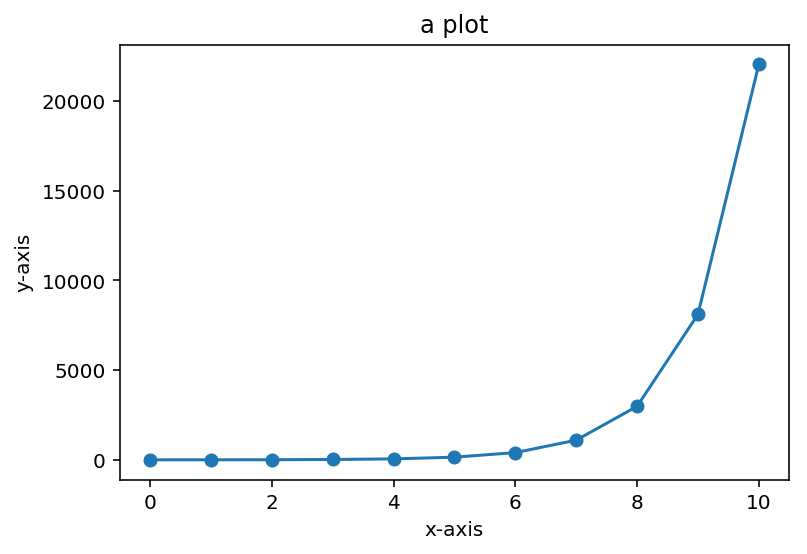

In [9]:
# test sns.set_context()
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

Note that your plot will have the style from the last `set_style` command; these two commands work together. 

Like with styles, you can customize the context settings. The context settings can be found with `sns.plotting_context("context-name")` and anything from this can be customized when calling `sns.set_context`, e.g. `sns.set_context('ticks',rc={"property-name":"custom-value"}`. Use this to achieve the following:
* A plot in the `talk` style with lines of width 1
* A plot in the `paper` style with grid lines of with 5 (make sure to use a style that shows these!). 
* A plot in the `paper` style where all fontsizes are ~25% larger than the defaults.

In [16]:
# list options
sns.plotting_context('paper').keys()

dict_keys(['font.size', 'axes.labelsize', 'axes.titlesize', 'xtick.labelsize', 'ytick.labelsize', 'legend.fontsize', 'axes.linewidth', 'grid.linewidth', 'lines.linewidth', 'lines.markersize', 'patch.linewidth', 'xtick.major.width', 'ytick.major.width', 'xtick.minor.width', 'ytick.minor.width', 'xtick.major.size', 'ytick.major.size', 'xtick.minor.size', 'ytick.minor.size'])

In [10]:
# plot with talk style and lines of width 1

In [12]:
# plot with paper style, grid lines of width 5

In [13]:
# plot with paper style where all font sizes are ~25% larger than the defaults

Changing all those font sizes is quite some work. Have a look at the documentation of `sns.set_context` to see if there is an easier way and test this.

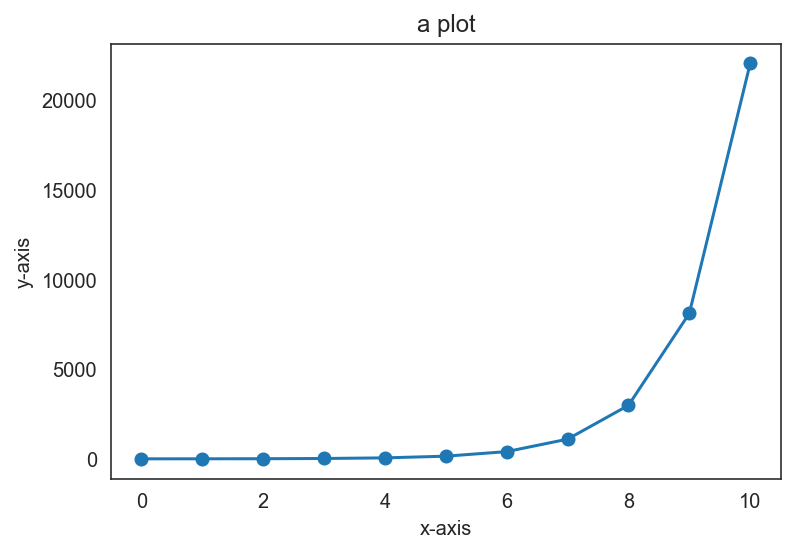

In [14]:
sns.set_style("white")
# use the option of sns.set_context to scale font
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

# Legend positioning

Most plots contain more than one line, and therefore they need a legend. But, as shown below, this can become hard when the plot is filled with a lot of data.

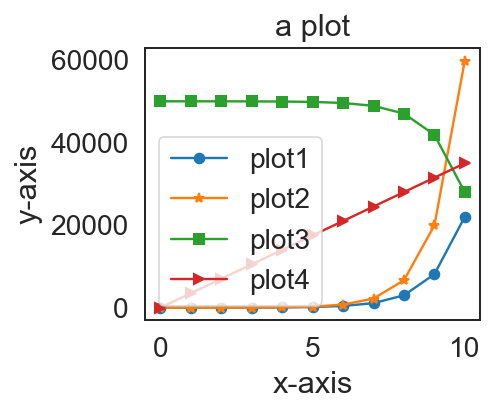

In [41]:
sns.set_style("white")
# use the option font_scale
sns.set_context("paper",font_scale=1.6)
x = np.linspace(0,10,11)
y1 = np.exp(x)
y2 = np.exp(1.1*x)
y3 = 50000-np.exp(x)
y4 = 3500*x
fig = plt.figure(figsize=(3,2.5))
ax = plt.gca()
ax.plot(x,y1,'-',marker='o',label='plot1');
ax.plot(x,y2,'-',marker='*',label='plot2');
ax.plot(x,y3,'-',marker='s',label='plot3');
ax.plot(x,y4,'-',marker='>',label='plot4')
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');
ax.legend()

There are two options to fix this:
1. make the legend smaller such that it fits
2. place the legend outside of the plot

First, we try to make the legend smaller. As we do not want to reduce the font size, can only remove whitespace and remove anything unnecessary. Change the following arguments of `ax.legend()` and see what happens: `borderpad`, `labelspacing` and `handletextpad`.



`borderpad` sets the distance between (padding) the content of the legend and the legend border:

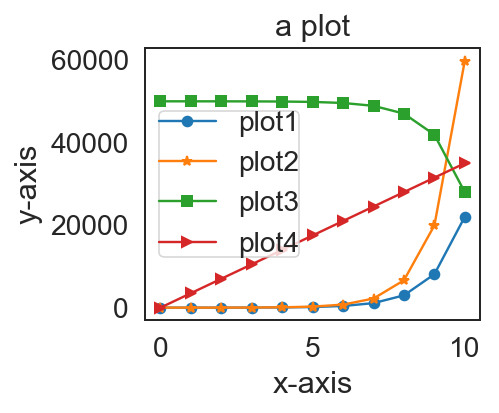

In [42]:
fig = plt.figure(figsize=(3,2.5))
ax = plt.gca()
ax.plot(x,y1,'-',marker='o',label='plot1');
ax.plot(x,y2,'-',marker='*',label='plot2');
ax.plot(x,y3,'-',marker='s',label='plot3');
ax.plot(x,y4,'-',marker='>',label='plot4')
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');
ax.legend(borderpad=0)

`labelspacing` sets the vertical spacing between legend elements

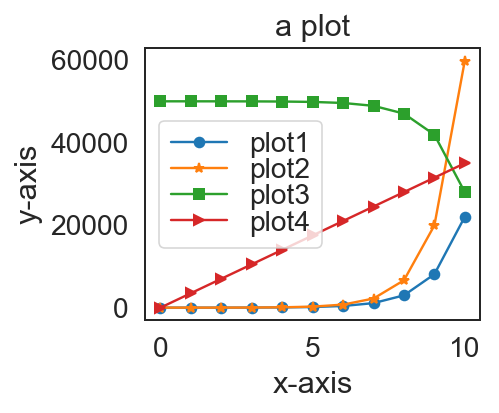

In [43]:
fig = plt.figure(figsize=(3,2.5))
ax = plt.gca()
ax.plot(x,y1,'-',marker='o',label='plot1');
ax.plot(x,y2,'-',marker='*',label='plot2');
ax.plot(x,y3,'-',marker='s',label='plot3');
ax.plot(x,y4,'-',marker='>',label='plot4')
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');
ax.legend(labelspacing=0)

`handletextpad` sets the distance between (padding) the handle and the label.

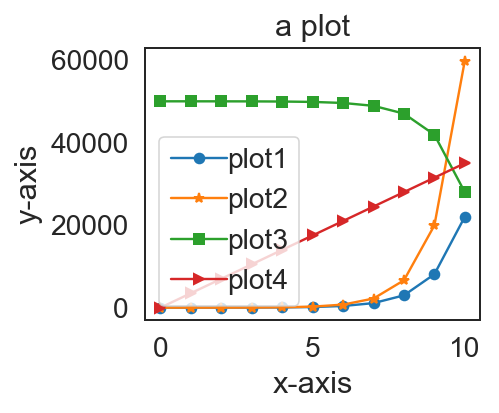

In [44]:
fig = plt.figure(figsize=(3,2.5))
ax = plt.gca()
ax.plot(x,y1,'-',marker='o',label='plot1');
ax.plot(x,y2,'-',marker='*',label='plot2');
ax.plot(x,y3,'-',marker='s',label='plot3');
ax.plot(x,y4,'-',marker='>',label='plot4')
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');
ax.legend(handletextpad=0)

Another way to save some space is to make the lines in the legend a bit shorter:

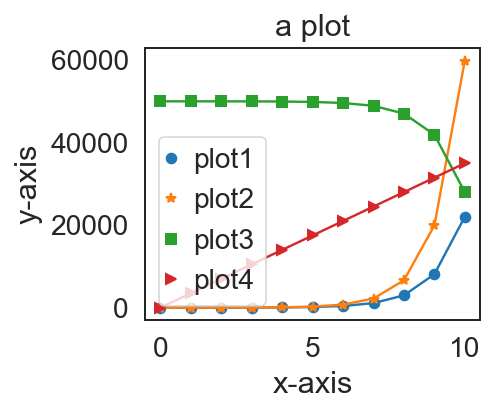

In [45]:
fig = plt.figure(figsize=(3,2.5))
ax = plt.gca()
ax.plot(x,y1,'-',marker='o',label='plot1');
ax.plot(x,y2,'-',marker='*',label='plot2');
ax.plot(x,y3,'-',marker='s',label='plot3');
ax.plot(x,y4,'-',marker='>',label='plot4')
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');
ax.legend(handlelength=0)

Use `handletextpad`, `labelspacing`, `borderpad` and `handlelength` to make the legend fit in and empty spot *inside* the plot.

In [15]:
# make legend fit

In some cases it is really impossible to fit the legend in the plot. Furthermore, when you have a subplot where the legend applies to multiple plots, it may be better to put the legend outside the plot. You have already learned that you can use the `loc` argument to set the position with a number (0 = best, 1 = upper right, etc). However, `loc` can also be used for more precise positioning; when `loc=(x,y)`, the lower-left corner of the legend will be at (x,y). Note that x and y are specified relative to the plot; (0,0) is the bottom left and (1,1) is the bottom right. 

Use the `loc` argument to place the plot in the lower right corner outsize of the plot and make sure that the box of the legend does not touch the border of the plot.

In [16]:
# put legend next to the plot

# Heatmaps

Colormaps are used to map numbers to colors. What colormap is a good colormap depends on the data and the context. One type of plot in which colormaps are commonly used are heatmaps,. Below we plotted a heatmap using seaborn's `heatmap` function. A similar heatmap could also be creates using plain matplotlib for this, but the `heatmap` function makes it much easier. 


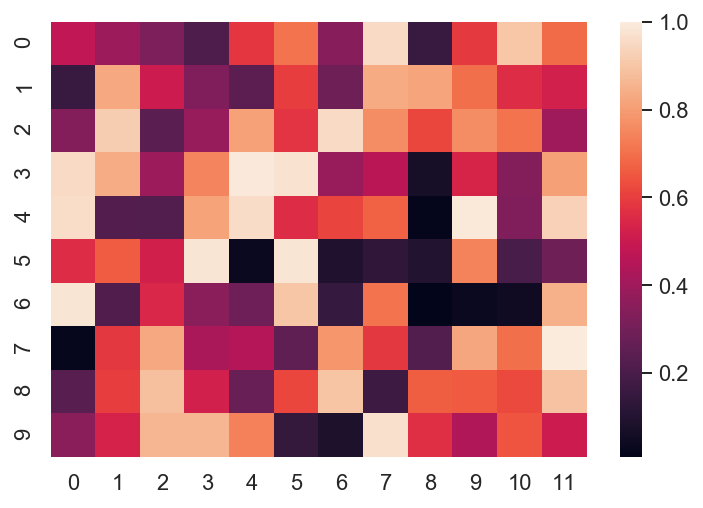

In [20]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

A single value can make the full heatmap useless.

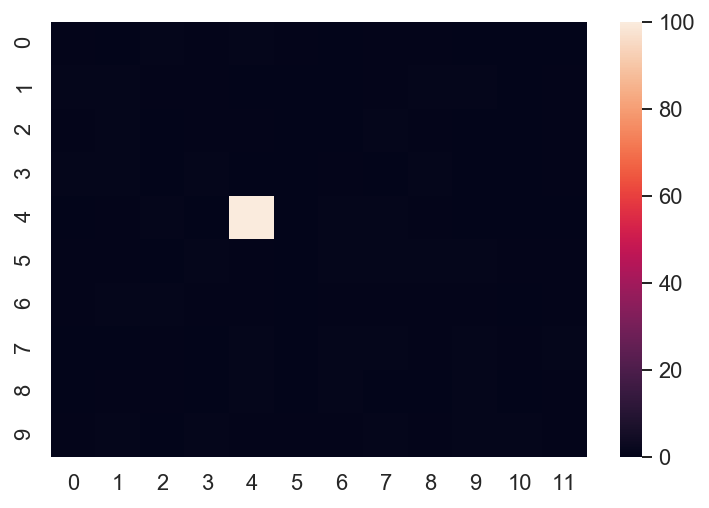

In [21]:
alt_data = np.random.rand(10, 12)
alt_data[4,4] = 100
ax = sns.heatmap(alt_data)

Look for the option `vmax` in the documentation and use it to make this heatmap useful. 

In [17]:
alt_data = np.random.rand(10, 12)
alt_data[4,4] = 100
# use option vmax to improve heatmap

Changing the colormap of the heatmap is done with the `cmap` option: `sns.heatmap(data,cmap="colormap")`, where `"colormap"` refers to one of the many predefined colormaps of matplotlib. Have a look at the colormaps [here](https://matplotlib.org/examples/color/colormaps_reference.html) and try a couple. If you have the time, have a look at this [article](https://matplotlib.org/tutorials/colors/colormaps.html) on how to choose the best colormap for your data. 

In [18]:
# try some colormaps